In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sns.set()

warnings.filterwarnings('ignore')

%matplotlib inline
color = sns.color_palette()

# Upload data

In [2]:
data_total = pd.read_csv('data/pre_preprocessed_data/data_total.csv')

# Handle data_combined missing values

In [3]:
missing_values = data_total.isnull().sum().sort_values(ascending=False)
percent_data = (data_total.isnull().sum() / data_total.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_values, percent_data], axis=1, keys=['Total', 'Percent'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print('Missing data:\n', missing_data)

Missing data:
                                                      Total   Percent
COMMONAREA_MEDI                                     248360  0.697141
COMMONAREA_AVG                                      248360  0.697141
COMMONAREA_MODE                                     248360  0.697141
STATUS_C                                            246934  0.693138
NONLIVINGAPARTMENTS_AVG                             246861  0.692933
NONLIVINGAPARTMENTS_MEDI                            246861  0.692933
NONLIVINGAPARTMENTS_MODE                            246861  0.692933
STATUS_X                                            244658  0.686750
LIVINGAPARTMENTS_AVG                                242979  0.682037
LIVINGAPARTMENTS_MODE                               242979  0.682037
LIVINGAPARTMENTS_MEDI                               242979  0.682037
FLOORSMIN_MODE                                      241108  0.676785
FLOORSMIN_MEDI                                      241108  0.676785
FLOORSMIN_AVG      

In [4]:
data_total = data_total.drop(columns=['COMMONAREA_AVG', 'COMMONAREA_MODE',
                                    'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',   
                                    'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE',
                                    'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 
                                    'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG',
                                    'OWN_CAR_AGE', 'LANDAREA_AVG', 'LANDAREA_MODE',
                                    'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG',
                                    'ELEVATORS_AVG', 'ELEVATORS_MODE',
                                    'APARTMENTS_MODE', 'APARTMENTS_AVG',
                                    'ENTRANCES_AVG', 'ENTRANCES_MODE',
                                    'LIVINGAREA_MODE', 'LIVINGAREA_AVG',
                                     'FLOORSMAX_AVG', 'FLOORSMAX_MODE',
                                    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 
                                    ])

In [5]:
missing_values = data_total.isnull().sum().sort_values(ascending=False)
percent_data = (data_total.isnull().sum() / data_total.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_values, percent_data], axis=1, keys=['Total', 'Percent'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print('Missing data:\n', missing_data)

Missing data:
                                                      Total   Percent
COMMONAREA_MEDI                                     248360  0.697141
STATUS_C                                            246934  0.693138
NONLIVINGAPARTMENTS_MEDI                            246861  0.692933
STATUS_X                                            244658  0.686750
LIVINGAPARTMENTS_MEDI                               242979  0.682037
FLOORSMIN_MEDI                                      241108  0.676785
AMT_ANNUITY_y                                       238031  0.668148
YEARS_BUILD_MEDI                                    236306  0.663306
STATUS_0                                            225560  0.633142
MONTHS_COUNT                                        221713  0.622344
MONTHS_MIN                                          221713  0.622344
MONTHS_MAX                                          221713  0.622344
LANDAREA_MEDI                                       210844  0.591835
BASEMENTAREA_MEDI  

### Option - cope with missing values

In [6]:
for column in  missing_data.index:
    try:
        data_total[column] = data_total[column].fillna(data_total[column].mode()[0])
    except:
        continue

### Check missing values

In [7]:
data_total.isnull().sum().values.sum()

0

### Check target variable

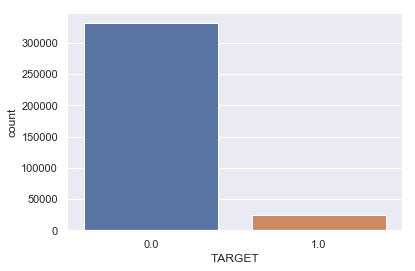

In [8]:
sns.countplot(data_total['TARGET'], label='Sum')
plt.show()

# Handle data formats

In [9]:
data_total['DAYS_ID_PUBLISH'] = abs(data_total['DAYS_ID_PUBLISH'].values)
data_total['DAYS_EMPLOYED'] = abs(data_total['DAYS_EMPLOYED'].values)
data_total['DAYS_BIRTH'] = abs(data_total['DAYS_BIRTH'].values)
data_total['DAYS_REGISTRATION'] = abs(data_total['DAYS_REGISTRATION'].values)
data_total['DAYS_LAST_PHONE_CHANGE'] = abs(data_total['DAYS_LAST_PHONE_CHANGE'].values)

# Make correlation analysis

In [10]:
# corrmat = data_total.corr()
# k = 50
# cols = corrmat.nlargest(k, 'TARGET')['TARGET'].index
# cm = np.corrcoef(data_total[cols].values.T)
# sns.set(font_scale=1.25)
# f, ax = plt.subplots(figsize=(100, 100))
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
#                  annot_kws={'size': 10}, yticklabels=cols.values,xticklabels=cols.values)
# plt.show()

# Split Dataset on train, test and test_main

In [11]:
fillna_data = data_total[:307511]
test_main_f = data_total[307511:]

data_fillna_train = fillna_data.copy()
data_fillna_test = data_fillna_train.sample(frac=0.3)
print(data_fillna_test.shape)

test_id = data_fillna_test.index.values
train_id = data_fillna_train.index.values

ids = np.setdiff1d(train_id, test_id)

data_fillna_train = data_fillna_train.iloc[ids]
data_fillna_train.shape

(92253, 473)


(215258, 473)

# Splitting dataset on targets and features

In [12]:
f_train_y = data_fillna_train['TARGET']
f_train_x = data_fillna_train.copy()
del f_train_x['TARGET']
# del f_train_x['SK_ID_CURR']

f_test_y = data_fillna_test['TARGET']
f_test_x = data_fillna_test.copy()
del f_test_x['TARGET']
# del f_test_x['SK_ID_CURR']
del test_main_f['TARGET']
# del test_main_f['SK_ID_CURR']

# Handle outliers

In [13]:
f_train_x['TARGET'] = f_train_y.values

cols = f_train_x.columns
num_cols = f_train_x._get_numeric_data().columns
print(num_cols)
num_train = f_train_x.select_dtypes(include=["number"])
cat_train = f_train_x.select_dtypes(exclude=["number"])
num_train.shape
Q1 = num_train.quantile(0.001)
Q3 = num_train.quantile(0.999)
IQR = Q3 - Q1
idx = ~((num_train < (Q1 - 1.5 * IQR)) | (num_train > (Q3 + 1.5 * IQR))).any(axis=1)
f_train_x = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)

f_train_y = f_train_x['TARGET']
del f_train_x['TARGET']

f_train_x.shape

Index(['Unnamed: 0', 'AMT_ANNUITY_x', 'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x',
       'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       ...
       'AMT_PAYMENT_y', 'SK_ID_PREV_y.2', 'SK_ID_PREV_y.3',
       'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT',
       'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT', 'TARGET'],
      dtype='object', length=473)


(209893, 472)

In [14]:
train_id = pd.DataFrame(f_train_x['SK_ID_CURR'], columns=['SK_ID_CURR'])
test_id = pd.DataFrame(data_fillna_test['SK_ID_CURR'],  columns=['SK_ID_CURR'])
train_label = pd.DataFrame(f_train_y, columns=['TARGET'])

train_label.to_csv('data/data_for_model/train_label.csv', index=False)
test_id.to_csv( 'data/data_for_model/test_id.csv', index=False)
train_id.to_csv('data/data_for_model/train_id.csv', index=False)

# Handle nan vals

In [15]:
x_train = np.nan_to_num(f_train_x)
x_test =  np.nan_to_num(f_test_x)
x_main_test = np.nan_to_num(test_main_f)

# Normalization

In [19]:
x = pd.DataFrame(x_test[:1000], columns=f_test_x.columns)
x.to_csv('fff.csv')

In [16]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_main_test = scaler.transform(x_main_test)

y_train = f_train_y.copy()
y_test = f_test_y.copy()

In [19]:
import pickle

#
# Create your model here (same as above)
#

# Save to file in the current working directory
pkl_filename = "min_max_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
Ypredict = pickle_model.transform(x_train)

# Handle imbalance data

### Oversampling

In [ ]:
# from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SMOTENC
# from collections import Counter

# x_resampled, y_resampled = BorderlineSMOTE().fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

# smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
# x_resampled, y_resampled = smote_nc.fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

# x_train, y_train = SMOTE().fit_resample(x_train, y_train)
# print(sorted(Counter(y_train).items()))

# x_resampled, y_resampled = ADASYN().fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

# Select and Save Entire dataset

In [34]:
xxx = pd.read_csv('data/fixed_data/main_test.csv')

train_label = pd.read_csv('data/data_for_model/train_label.csv')
test_id = pd.read_csv( 'data/data_for_model/test_id.csv')
train_id = pd.read_csv('data/data_for_model/train_id.csv')

In [35]:
x_test_df = pd.DataFrame(data=x_test, columns=f_test_x.columns)
y_test_df = pd.DataFrame(data=y_test, columns=['TARGET'])
x_test_df['SK_ID_CURR'] = test_id['SK_ID_CURR'].values

x_not_balanced_df = pd.DataFrame(data=x_train, columns=f_train_x.columns)
y_not_balanced_df = pd.DataFrame(data=y_train, columns=['TARGET'])
x_not_balanced_df['SK_ID_CURR'] = train_id['SK_ID_CURR'].values

x_main_test_df = pd.DataFrame(data=x_main_test, columns=test_main_f.columns)
x_main_test_df['SK_ID_CURR'] = xxx['SK_ID_CURR'].values
 
del x_test_df['Unnamed: 0']

del x_not_balanced_df['Unnamed: 0']

del x_main_test_df['Unnamed: 0']

x_not_balanced_df.to_csv('data/data_for_model/x_train.csv', index=False)
y_not_balanced_df.to_csv('data/data_for_model/y_train.csv', index=False)

x_test_df.to_csv('data/data_for_model/x_test.csv', index=False)
y_test_df.to_csv('data/data_for_model/y_test.csv', index=False)

x_main_test_df.to_csv('data/data_for_model/x_main_test.csv', index=False)